# Data preparation

In [65]:
with open('names.txt', 'r') as f:
    words = f.read().split('\n')
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

##### exploring data

In [4]:
import pandas as pd

# Example DataFrame
data = {'words': words}
df = pd.DataFrame(data)

# Get the counts of each unique word
word_counts = df['words'].value_counts()

print(word_counts)

df['words'].unique


words
emma         2
weslee       2
zailyn       2
meritt       2
jayce        2
            ..
josseline    1
joory        1
jolin        1
joliet       1
zzyzx        1
Name: count, Length: 29494, dtype: int64


<bound method Series.unique of 0            emma
1          olivia
2             ava
3        isabella
4          sophia
           ...   
32028       zylas
32029       zyran
32030       zyrie
32031       zyron
32032       zzyzx
Name: words, Length: 32033, dtype: object>

##

# Approach #1: Count approach

In [5]:
len(words)

32033

In [6]:
# shortest word

min( len(_) for _ in words)


2

In [7]:
min_length=len(words[0]); smallest_name_idx =0
for i,w in enumerate(words):
    current_length = len(w)
    if current_length <min_length:
        min_length = current_length
        smallest_name_idx = i



min_length, words[smallest_name_idx]
            

(2, 'an')

In [8]:
min(words, key=len), max(words, key=len)

('an', 'muhammadibrahim')

In [9]:
# SLIDING WINDOW
# iteate with two character at one  # no stopping confition is needed



b = {}# dict to mantain count of bigram
for w in words:         # emma
    chs = ['<S>'] + list(w) +['<E>']  # ['<S>', 'e', 'm', 'm', 'a', '<E>'] 
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # ['<S>', 'e'] : bigram of start character  # ['a', '<E>'] : bigram of end
        # calculting frequency of these characters

        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0)+1
        # b[bigram]=  b[bigram] +1 if bigram in b.keys() else 1
        # print(bigram)
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [10]:
b.items()

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [11]:
sorted(b.items(), key=lambda kv:kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [12]:
# instead of dict we want store info in b to a 2d array, r
# rows = first charcter
# cols = second character
# each entry in this 2d array will tells us odten the second character follows the first character. 

import torch
a = torch.zeros((3,5), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
a, a.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

(tensor([[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]], dtype=torch.int32),
 torch.int32)

In [13]:
a[1,3] =1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [14]:
a[1][3]+=10
a

tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0, 11,  0],
        [ 0,  0,  0,  0,  0]], dtype=torch.int32)

In [15]:
# instead of dict we want store info in b to a 2d array, r
# rows = first charcter
# cols = second character
# each entry in this 2d array will tells us odten the second character follows the first character. 


concurrency_matrix = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
concurrency_matrix.shape, concurrency_matrix.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

(torch.Size([28, 28]), torch.int32)

In [16]:
# alphabets = [chr(_) for _ in range(ord('a'), ord('z')+1)]
# rows = ['<S>'] + ['<E>'] + alphabets
# print(rows)

In [17]:
sorted(set("".join(words)))

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [18]:
# concurrency_matrix = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
# concurrency_matrix, concurrency_matrix.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

N = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
N, N.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed


# alphabets = [chr(_) for _ in range(ord('a'), ord('z')+1)]
alphabets = list(set("".join(words)))

chars = sorted(alphabets) + ['<S>'] + ['<E>'] 
stoi ={ s:i for i , s in enumerate(chars)}
print(len(stoi), stoi)





b = {}# dict to mantain count of bigram
for w in words:         # emma
    chs = ['<S>'] + list(w) +['<E>']  # ['<S>', 'e', 'm', 'm', 'a', '<E>'] 
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # ['<S>', 'e'] : bigram of start character  # ['a', '<E>'] : bigram of end
        # calculting frequency of these characters

        bigram = (ch1, ch2)
        # b[bigram] = b.get(bigram, 0)+1
        # print(ch1, ch2)
        # print(rows.index(ch1))
        # print(rows.index(ch2))

        # concurrency_matrix[chars.index(ch1), chars.index(ch2)]+=1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1
        # b[bigram]=  b[bigram] +1 if bigram in b.keys() else 1
        # print(bigram)


# concurrency_matrix[chars.index('n'), chars.index('<E>')]

N

28 {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

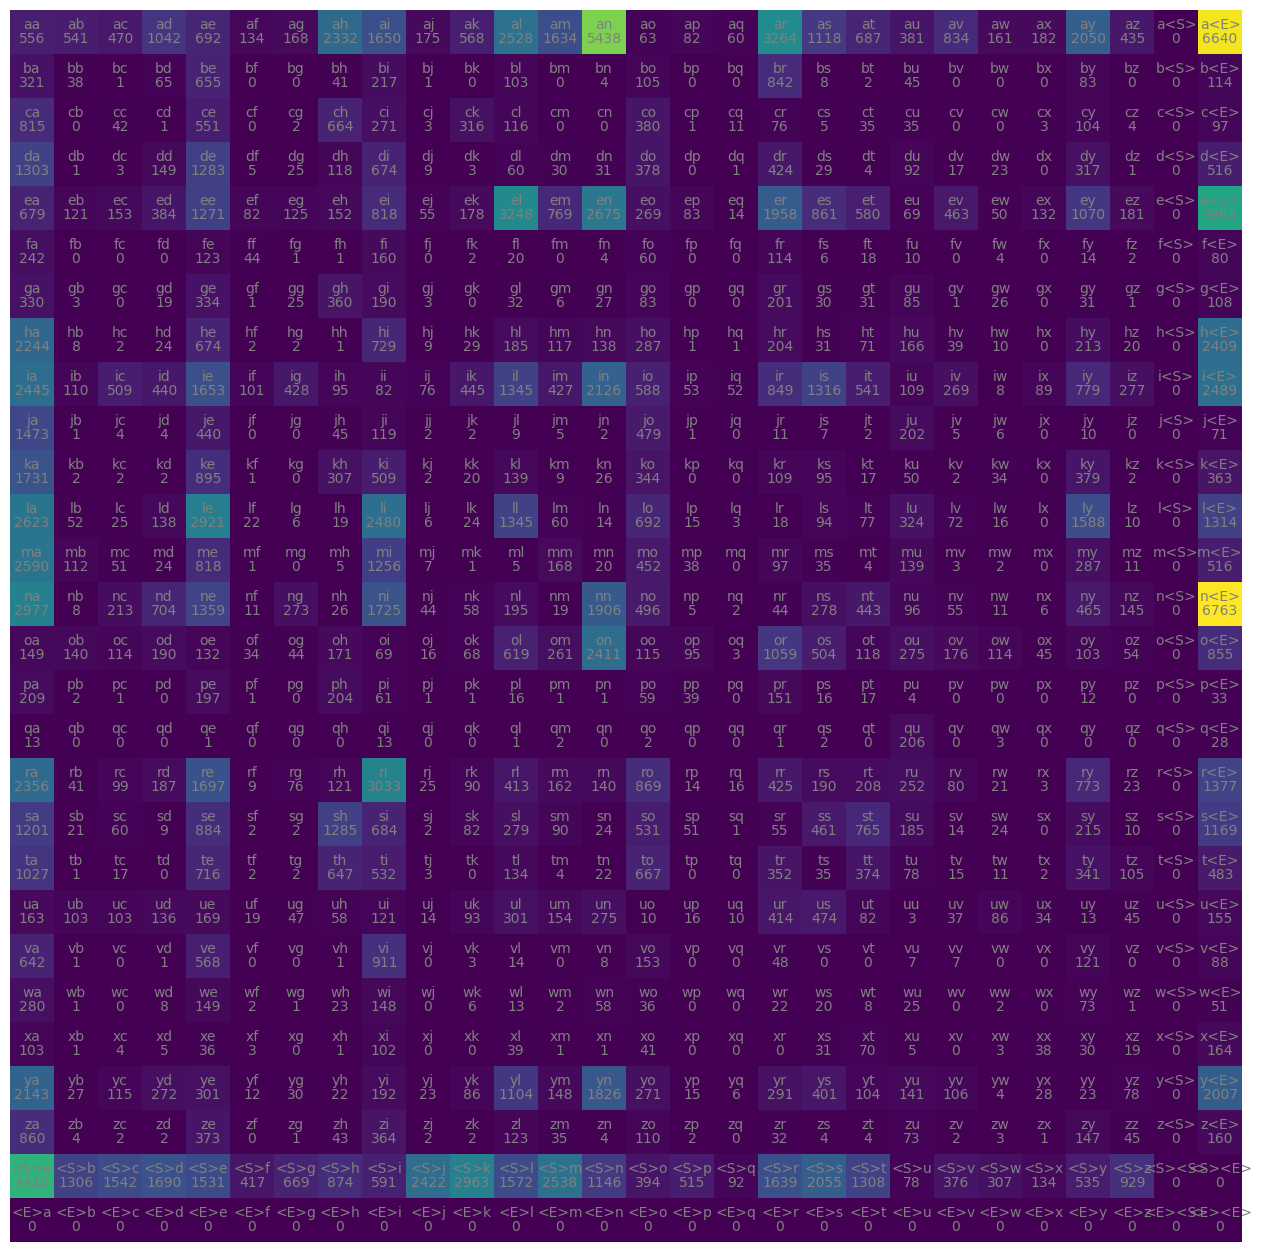

In [19]:

import matplotlib.pyplot as plt
%matplotlib inline


itos = {i:s for s,i in stoi.items()}  #reverse dictionary

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i]+itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.imshow(N)

### reduce special token from 2 to 1

stoi: {'<.>': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
itos: {0: '<.>', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}

      first row is count for all first letters i.e. `<.> a`
      first column is count for all last letters i.e.`a<.>`
      
      


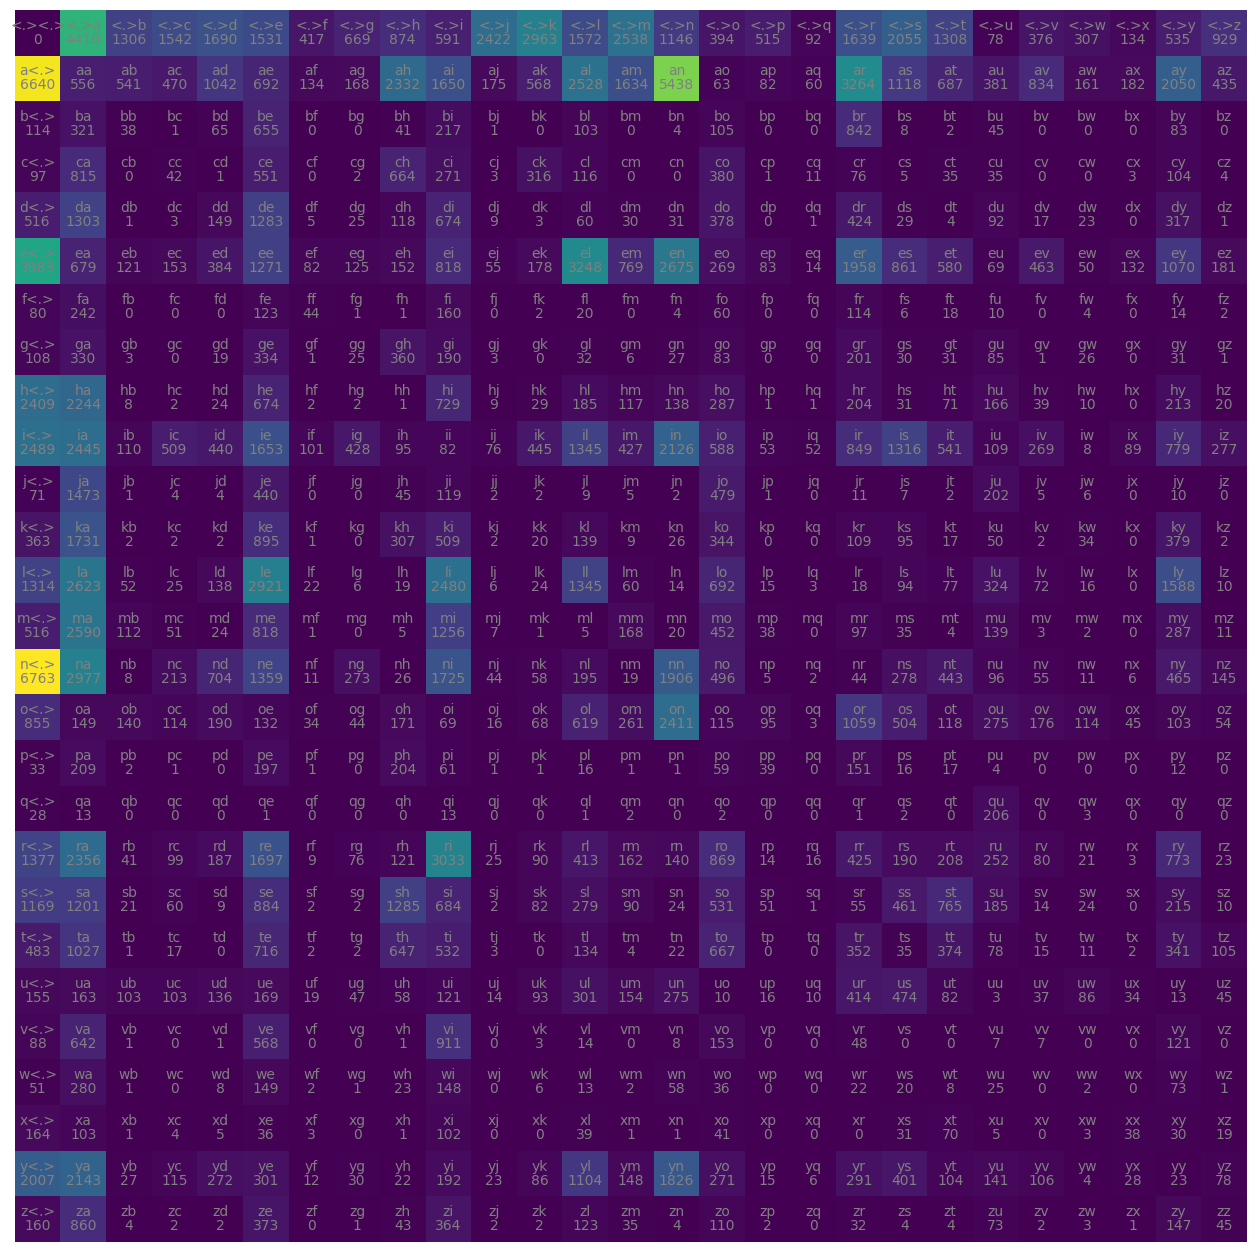

In [20]:
# concurrency_matrix = torch.zeros((28,28), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
# concurrency_matrix, concurrency_matrix.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

N = torch.zeros((27,27), dtype=torch.int32)  #26: letters, 1: <S> 1: <E>
N, N.dtype   # single precision floating point numbers: float32 but we want to store count so precision is not needed

alphabets = set("".join(words))
chars = ['<.>'] + sorted(alphabets)  # indexes


# alphabets = [chr(_) for _ in range(ord('a'), ord('z')+1)]
# alphabets = list(set("".join(words)))

# chars = ['.'] + sorted(alphabets) 
# chars = ['<.>'] + sorted(alphabets)  # indexes

# chars = sorted(alphabets) 

stoi ={ s:i for i , s in enumerate(chars)}
# stoi['<.>']=0
# print(len(stoi), stoi)
itos={i:s for s, i in stoi.items()}

print(f"stoi: {stoi}")
print(f"itos: {itos}")




b = {}# dict to mantain count of bigram
for w in words:         # emma
    chs = ['<.>'] + list(w) +['<.>']  # ['<S>', 'e', 'm', 'm', 'a', '<E>'] 
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        # print(ch1, ch2)
        # ['<S>', 'e'] : bigram of start character  # ['a', '<E>'] : bigram of end
        # calculting frequency of these characters

        # bigram = (ch1, ch2)
        # b[bigram] = b.get(bigram, 0)+1
        # print(ch1, ch2)
        # print(rows.index(ch1))
        # print(rows.index(ch2))

        # concurrency_matrix[chars.index(ch1), chars.index(ch2)]+=1
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1
        # b[bigram]=  b[bigram] +1 if bigram in b.keys() else 1
        # print(bigram)


# concurrency_matrix[chars.index('n'), chars.index('<E>')]




import matplotlib.pyplot as plt
%matplotlib inline


itos = {i:s for s,i in stoi.items()}  #reverse dictionary

plt.figure(figsize=(16, 16))
# plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.imshow(N)




print("""
      first row is count for all first letters i.e. `<.> a`
      first column is count for all last letters i.e.`a<.>`
      
      """)


In [21]:
# first row is all starting values
# first column is all ending values

### converting raw counts into probabilities

In [22]:
N[0, :] # gives raw values of all starting characters  i.e. <s>a

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [23]:
N[0, :].shape

torch.Size([27])

In [24]:
N[: , 0].shape

torch.Size([27])

In [25]:
N[0]/N[0].sum()

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [26]:
print("-----\nwe want to sample from these raw counts but fiest we need to convert them to probabilities.\n----")
p = N[0,:].float()
p /= p.sum()  # NORMALIZING  # so that sum of all probs is equala to 1
p

-----
we want to sample from these raw counts but fiest we need to convert them to probabilities.
----


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [27]:
p.sum()

tensor(1.)

In [28]:
# generator is being used to make sampling deterministic

g = torch.Generator()
# g.manual_seed(2147483647)
# p = torch.rand(size=(3,), generator=g)
# p/=p.sum() # convert to probs
# p

In [29]:
#  as probs are tensor([0.6064, 0.3033, 0.0903]), we expect first elemnt to be present 60% of times

torch.multinomial(p, num_samples=20, replacement=True, generator=g)  #replacement =True mean we can redraw it after putting back

tensor([ 2, 13,  5, 12, 14, 13,  6, 20, 13, 15, 10,  1,  1, 19, 13, 26,  1,  1,
         4,  1])

In [30]:
# so back to code
#  as probs are tensor([0.6064, 0.3033, 0.0903]), we expect first elemnt to be present 60% of times
#replacement =True mean we can redraw it after putting back
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
ix, itos[ix]

(10, 'j')

In [31]:
g = torch.Generator().manual_seed(2147483647)


for i in range(10):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # grab row corresponding to ix
        p = N[ix].float()
        p/= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # new idx
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))

junide<.>
janasah<.>
p<.>
cony<.>
a<.>
nn<.>
kohin<.>
tolian<.>
juee<.>
ksahnaauranilevias<.>


## lets try uniform distribution

In [32]:
g = torch.Generator().manual_seed(2147483647)


for i in range(10):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # trained model
        # grab row corresponding to ix
        p = N[ix].float()
        p/= p.sum()

        # p = torch.ones(27)/27.0 # with trained model-- uniform distribution -- 

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # new idx
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))

junide<.>
janasah<.>
p<.>
cony<.>
a<.>
nn<.>
kohin<.>
tolian<.>
juee<.>
ksahnaauranilevias<.>


## Make it efficient

### rather than normalizing N[idx], for every iteration, we'll calculate all at once

In [33]:
P = N.float()
print(P.size(), P.sum(dim=1,keepdim=True).shape)
P /= P.sum(dim=1,keepdim=True)  # horizontal sum   # broadcasting ,we gro from right to left;; each dimension has either to be 1 or equal or on eof them doesn't exist
# use inplace opeations , they dont create a copy
P.shape


# in concurrency matrix some along rows and summ along columns dimension is same

torch.Size([27, 27]) torch.Size([27, 1])


torch.Size([27, 27])

In [34]:
P[0].sum()

tensor(1.)

In [35]:
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # trained model
        # grab row corresponding to ix
        # p = N[ix].float()
        # p/= p.sum()

        # p = torch.ones(27)/27.0 # with trained model-- uniform distribution -- 
        p=P[ix]

        ix = torch.multinomial(p , num_samples=1, replacement=True, generator=g).item() # new idx  # idx is being taken as probabilities
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))

junide<.>
janasah<.>
p<.>
cony<.>
a<.>


## Evaluate quality of this model

In [36]:
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:0.4f}")

<.>e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a<.>: 0.1960
<.>o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a<.>: 0.1960
<.>a: 0.1377
av: 0.0246
va: 0.2495
a<.>: 0.1960


In [37]:
 # as we have 27 chars, for all chars to be equal likely, each character must have 
1/len(chars) # 4 percent roughly
# for a pefect model we expect these probabilities to be near 1.


0.037037037037037035

## for a pefect model we expect these probabilities to be near 1.

In [38]:

for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:0.4f}")

        

<.>e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a<.>: 0.1960
<.>o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a<.>: 0.1960
<.>a: 0.1377
av: 0.0246
va: 0.2495
a<.>: 0.1960


Now we need to summarize all these probailities into a single number so that measures quality of this model
 likelihood is the product of all these proabilities so, it is actually telling us about probs of entire dataset assigned by the model to be trained.
 so the product of these probabilities should be as high  as possible. but as all probs show in above are very small number so their product would be very tiny so instead of wokring 
 with numbers directly, we work with log likelihood(log is for scale here)

 
![alt text](log_scale.png)

here, 
    log(probility =1) = 0
    log(probility = 0.001) = -3


    lower the probability, more -ve the number.

    log(abc) = log(a) + log(b) +log(c)

In [39]:


log_likelihood = 0
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always try to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

<.>e: prob: 0.0478 ; log_prob: -3.0408
em: prob: 0.0377 ; log_prob: -3.2793
mm: prob: 0.0253 ; log_prob: -3.6772
ma: prob: 0.3899 ; log_prob: -0.9418
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>o: prob: 0.0123 ; log_prob: -4.3982
ol: prob: 0.0780 ; log_prob: -2.5508
li: prob: 0.1777 ; log_prob: -1.7278
iv: prob: 0.0152 ; log_prob: -4.1867
vi: prob: 0.3541 ; log_prob: -1.0383
ia: prob: 0.1381 ; log_prob: -1.9796
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>a: prob: 0.1377 ; log_prob: -1.9829
av: prob: 0.0246 ; log_prob: -3.7045
va: prob: 0.2495 ; log_prob: -1.3882
a<.>: prob: 0.1960 ; log_prob: -1.6299
log_likelihood = tensor(-38.7856)


#### -ve log likelihood

In [40]:


log_likelihood = 0
n = 0
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn

<.>e: prob: 0.0478 ; log_prob: -3.0408
em: prob: 0.0377 ; log_prob: -3.2793
mm: prob: 0.0253 ; log_prob: -3.6772
ma: prob: 0.3899 ; log_prob: -0.9418
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>o: prob: 0.0123 ; log_prob: -4.3982
ol: prob: 0.0780 ; log_prob: -2.5508
li: prob: 0.1777 ; log_prob: -1.7278
iv: prob: 0.0152 ; log_prob: -4.1867
vi: prob: 0.3541 ; log_prob: -1.0383
ia: prob: 0.1381 ; log_prob: -1.9796
a<.>: prob: 0.1960 ; log_prob: -1.6299
<.>a: prob: 0.1377 ; log_prob: -1.9829
av: prob: 0.0246 ; log_prob: -3.7045
va: prob: 0.2495 ; log_prob: -1.3882
a<.>: prob: 0.1960 ; log_prob: -1.6299
log_likelihood = tensor(-38.7856)
nll=tensor(38.7856)
normalized/avg nll: 2.4241



**normalized nll is quality of model.** the higher it is, the worse-off we are. 
Job of our training is to find parameters that minimize `nll loss`

### GOAL: maximize likelihood of the data w.r.t model parameters(statistical modeling)
equivalent to maximizing the log likelihood( because log is monotonic)
equivalent to minimizing -ve log_likelihood
equavalent to minimizing avg nll


so, in advanced exmplaes, cponcucurrency matrix will be calculated by NN and we'll be tuning model parameters to maximize log_likelihood by miniminzg avg nll

In [41]:


# evaluatign probs for one word.
log_likelihood = 0
n = 0
for w in ["zohaibq"]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn

<.>z: prob: 0.0290 ; log_prob: -3.5404
zo: prob: 0.0459 ; log_prob: -3.0819
oh: prob: 0.0216 ; log_prob: -3.8372
ha: prob: 0.2946 ; log_prob: -1.2220
ai: prob: 0.0487 ; log_prob: -3.0222
ib: prob: 0.0062 ; log_prob: -5.0809
bq: prob: 0.0000 ; log_prob: -inf
q<.>: prob: 0.1029 ; log_prob: -2.2736
log_likelihood = tensor(-inf)
nll=tensor(inf)
normalized/avg nll: inf


 **for bq's count is zero, log 0 is -inf, so it will make whole naormalized nll inf.**
 **as solution we'll do model smooething.we'll add some fake counts i.e. adding count of 1 to everything.**
 the more you add, more smoother model you'll get. less you add more peaked model you'll have

In [61]:
P = (N+1).float()
P/= P.sum(1, keepdim=True)




g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    ix = 0 # we always begin at index 0
    out = []
    while True:
        # trained model
        # grab row corresponding to ix
        # p = N[ix].float()
        # p/= p.sum()

        # p = torch.ones(27)/27.0 # with trained model-- uniform distribution -- 
        p=P[ix]

        ix = torch.multinomial(p , num_samples=1, replacement=True, generator=g).item() # new idx  # idx is being taken as probabilities
        out.append(itos[ix])
        if ix ==0:  # ending token
            # meand ix is end token
            break;

    print("".join(out))





log_likelihood = 0
n = 0
for w in words[:3]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn





junide<.>
janasah<.>
p<.>
cony<.>
a<.>
<.>e: prob: 0.0478 ; log_prob: -3.0410
em: prob: 0.0377 ; log_prob: -3.2793
mm: prob: 0.0253 ; log_prob: -3.6753
ma: prob: 0.3885 ; log_prob: -0.9454
a<.>: prob: 0.1958 ; log_prob: -1.6305
<.>o: prob: 0.0123 ; log_prob: -4.3965
ol: prob: 0.0779 ; log_prob: -2.5526
li: prob: 0.1774 ; log_prob: -1.7293
iv: prob: 0.0152 ; log_prob: -4.1845
vi: prob: 0.3508 ; log_prob: -1.0476
ia: prob: 0.1380 ; log_prob: -1.9807
a<.>: prob: 0.1958 ; log_prob: -1.6305
<.>a: prob: 0.1376 ; log_prob: -1.9835
av: prob: 0.0246 ; log_prob: -3.7041
va: prob: 0.2473 ; log_prob: -1.3971
a<.>: prob: 0.1958 ; log_prob: -1.6305
log_likelihood = tensor(-38.8086)
nll=tensor(38.8086)
normalized/avg nll: 2.4255


In [62]:



# evaluatign probs for one word.
log_likelihood = 0
n = 0
for w in ["zohaibq"]:
    chs = ['<.>']+list(w)+['<.>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        # firsT look at probabiliies that mode assigns to each of these bigrams

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f"{ch1}{ch2}: prob: {prob:0.4f} ; log_prob: {logprob:0.4f}")
        # lower the probability, more -ve the number

print(f"{log_likelihood = }")

# so if all probs are 1, the likelihood would be zero. mean max value of log_likelihood can be 0, and lower the probabilities, 
# low the log_likelihood will go
# and loss function has semantic that low is good, so we always Gtry to minimze the loss. That's why we'lll invert it, so that'd give use 
# -ve log likelihood

nll = -log_likelihood
print(f"{nll=}")
print(f"normalized/avg nll: {nll/n:.4f}") # this is our loss_fn


<.>z: prob: 0.0290 ; log_prob: -3.5402
zo: prob: 0.0458 ; log_prob: -3.0841
oh: prob: 0.0216 ; log_prob: -3.8348
ha: prob: 0.2937 ; log_prob: -1.2251
ai: prob: 0.0487 ; log_prob: -3.0224
ib: prob: 0.0063 ; log_prob: -5.0734
bq: prob: 0.0004 ; log_prob: -7.8906
q<.>: prob: 0.0970 ; log_prob: -2.3331
log_likelihood = tensor(-30.0036)
nll=tensor(30.0036)
normalized/avg nll: 3.7505


### no more infinite loss

## extra notes

In [42]:
f'{words = }'

"words = ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyto

This passage provides a concise explanation of the concept of **maximum likelihood estimation (MLE)** in statistics. Let me break it down for you:

### Key Concepts

1. **Observations and Joint Probability Distribution:**
   - You have a set of observations or data points. These observations are assumed to come from some joint probability distribution. However, this distribution is not fully known; it is described in terms of a set of unknown parameters.

2. **Parameters (θ):**
   - The unknown parameters that define the joint distribution are represented by a vector \( \theta = [\theta_1, \theta_2, \dots, \theta_k]^T \). Each \( \theta_i \) is a parameter of the distribution, and together they belong to the parameter space \( \Theta \), which is a subset of Euclidean space (meaning it's a set of possible parameter values).

3. **Parametric Family of Distributions:**
   - The joint probability distribution is part of a parametric family of distributions, denoted as \( \{ f(\cdot; \theta) \mid \theta \in \Theta \} \). This notation means that for each value of \( \theta \) in the parameter space \( \Theta \), there is a corresponding probability distribution function \( f(\cdot; \theta) \).

4. **Likelihood Function \( L_n(\theta) \):**
   - The likelihood function \( L_n(\theta) \) is derived by evaluating the joint probability density function at the observed data sample \( \mathbf{y} = (y_1, y_2, \dots, y_n) \). It is expressed as:
     \[
     L_n(\theta) = L_n(\theta; \mathbf{y}) = f_n(\mathbf{y}; \theta)
     \]
   - Here, \( L_n(\theta) \) is a real-valued function that represents how "likely" the observed data is, given a specific value of the parameter vector \( \theta \).

### Goal of Maximum Likelihood Estimation (MLE)
- **Objective:** The goal of MLE is to find the parameter vector \( \theta \) that maximizes the likelihood function \( L_n(\theta) \). This means finding the set of parameters for which the observed data \( \mathbf{y} \) is most probable.

### Summary
In simple terms, MLE is a method used to estimate the parameters of a probability distribution. You start with some observed data and assume it comes from a distribution defined by unknown parameters. MLE helps you find the parameter values that make the observed data most likely under that distribution.

In the context of maximum likelihood estimation (MLE), the data samples and the parameters indeed play different roles, but they are closely related. Let's clarify the relationship using your example where `x` represents data samples and the parameters could be thought of as weights associated with the data.

### Understanding Data Samples and Parameters

1. **Data Samples (e.g., `x`)**:
   - These are the observed values or measurements that you have collected. For example, in a dataset, `x` could represent individual data points such as features of a dataset.
   - The data samples are fixed once they are observed, and you use them to estimate the unknown parameters of the distribution.

2. **Parameters (e.g., `θ`, which might include weights)**:
   - Parameters define the underlying probability distribution or model that you believe generated the data. These could include things like the mean and variance in a Gaussian distribution, or weights in a linear model.
   - In a linear regression model, for example, the parameters are the weights \( \theta \) associated with each feature of your data samples \( x \).

### Relationship Between Data Samples and Parameters

- **Data Example (`x`)**: 
  - Represents the observed values in your dataset.
  - In a supervised learning context, `x` could be the input features, and `y` could be the output or label associated with each `x`.

- **Parameters (e.g., weights `θ`)**:
  - These are the unknown values that define how the data samples relate to the output (or how they are distributed).
  - For instance, in a linear regression model, the goal is to find the parameters \( \theta \) (the weights) that best predict the output \( y \) from the input \( x \).

### MLE in This Context

- In the MLE framework, you are trying to find the parameters (weights, \( \theta \)) that maximize the likelihood of observing your data \( x \).

- **Example in Linear Regression**:
  - Suppose you have a model: \( y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_k x_k + \epsilon \), where `y` is the dependent variable, `x_i` are the independent variables, and \( \epsilon \) is the error term.
  - The likelihood function would express the probability of observing the actual data given these parameters \( \theta \).
  - MLE helps you find the set of parameters \( \theta \) that make the observed data (the actual values of `x` and `y`) most probable.

### Summary

- **Data samples** (`x`) are the observed values that you have.
- **Parameters** (e.g., weights `θ`) are the unknown values that define the relationship between your data and the model.
- MLE finds the parameter values that maximize the likelihood of your observed data, making it the most probable under the assumed model. 

So, in MLE, you're adjusting the parameters (like weights) to fit your model to the data as closely as possible by maximizing the likelihood function.

In [43]:
#  as probs are tensor([0.6064, 0.3033, 0.0903]), we expect first elemnt to be present 60% of times

torch.multinomial(p, num_samples=20, replacement=True, generator=g)  #replacement =True mean we can redraw it after putting back

tensor([25, 14, 20, 18, 25, 13,  8, 19,  0, 13, 18, 10, 14, 18,  0,  9, 18,  0,
         8,  0])

In [44]:
# torch.multinomial(p, num_samples=3, replacement=False, generator=g)  #replacement =True mean we can redraw it after putting back

In [45]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)  #replacement =True mean we can redraw it after putting back

tensor([ 0, 14, 13, 14, 25, 12, 18, 26,  0, 18, 14,  9,  0, 18,  0,  2, 18,  9,
        14,  4])

In [46]:
x = torch.tensor([1,2,3,4,5,6,7])
x.sum()

tensor(28)

In [47]:
y = x/x.sum()
y

tensor([0.0357, 0.0714, 0.1071, 0.1429, 0.1786, 0.2143, 0.2500])

In [48]:
y.sum()

tensor(1.0000)

In [49]:
# now we'll be sampling from this distribution


In [50]:
weights = torch.tensor([0., 0.6, 0.1, 0.3], dtype=torch.float)  # Create a tensor of weights
sampled_indices = torch.multinomial(weights, 4)
print(sampled_indices)

tensor([3, 1, 2, 0])


In [51]:
xstoi ={ s:i for i , s in enumerate(chars)}
xstoi

{'<.>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [52]:
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [53]:
x = set("".join(words))
x

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [54]:
x = list(x)

In [55]:
for i in zip(x, x[1:], x[2:]):
    print(i)

('j', 'e', 's')
('e', 's', 'o')
('s', 'o', 't')
('o', 't', 'd')
('t', 'd', 'g')
('d', 'g', 'q')
('g', 'q', 'z')
('q', 'z', 'a')
('z', 'a', 'm')
('a', 'm', 'v')
('m', 'v', 'r')
('v', 'r', 'n')
('r', 'n', 'x')
('n', 'x', 'u')
('x', 'u', 'c')
('u', 'c', 'b')
('c', 'b', 'y')
('b', 'y', 'l')
('y', 'l', 'w')
('l', 'w', 'i')
('w', 'i', 'k')
('i', 'k', 'p')
('k', 'p', 'h')
('p', 'h', 'f')


In [56]:
alphas = [ chr(i) for i in range(ord('a'), ord('z'))]

In [57]:
xitos = { i:char for i, char in enumerate(alphas)}
xitos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y'}

In [58]:
stoi = { v:i for i,v in itos.items()}
stoi

{'<.>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

# Approach #2: NN approach

**our nn will take in a single character and predict probability of next character in sequence.
It will make guesses about what character is more likely to follow the input character.
In addition to that we wll be able to evaluate any setting of the parameters of nn because we have a loss function.
so, we'll be going to take a look at this probability distribition and we are going use labels which are essntailly just identity of next/second character in the bigram.
So, knowing what second chaeacter comes next in bigram, allows to look at how high the probability nn assigns to that characternf we , offcourse want that probability to be high ; that is another way of saying the loss is low.
So we'll be using gradient based optimization to tune parameters of this nn because we have loss function and we are going to minimize it; so we'll tune the weights that 
nn is correctlyy predicting the possibilities for the next character.**


### 1. create the training set of all the bigrams

In [88]:
# create the training set of bigrams (x,y)
xs, ys= [], []
for w in words[:1]:
    chs = ['<.>'] + list(w) + ['<.>']
    print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)        
ys = torch.tensor(ys)        


['<.>', 'e', 'm', 'm', 'a', '<.>']
<.> e
e m
m m
m a
a <.>


In [89]:
xs, [ itos[i.item()] for i in xs]

(tensor([ 0,  5, 13, 13,  1]), ['<.>', 'e', 'm', 'm', 'a'])

In [90]:
ys, [ itos[i.item()] for i in ys]

(tensor([ 5, 13, 13,  1,  0]), ['e', 'm', 'm', 'a', '<.>'])

In [91]:
# for i in xs:
#     print(itos[i])

itos[xs[1].item()]

'e'

###  In nn we have wx+b, so it doesn't make sense to make an input neuron take on an integer values that you feed in and then multiply it with weights.
so a common way of encoding integer values is `one hot encoding`
In one hot encoding, we take an integer like 13 and then we create a character that is all zeroes except for 13th dimension whihch we turn to one.
now we can feed that vector to nn


In [105]:
import torch.nn.functional as F

xenc = F.one_hot(input=xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [106]:
xenc.shape # we have 5 examples of embedding length 27


torch.Size([5, 27])

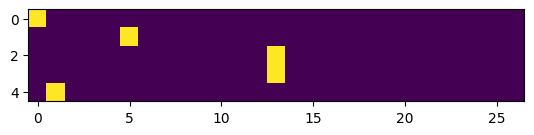

In [107]:
plt.imshow(xenc)

In [108]:
# always be careful with data type; we want dtype to be float numbers

xenc.dtype

torch.float32

### create Neuron

### torch.Tensor vs torch.tensor
torch.tensor inder dtype automatically while Torch.Tensor just returns float tensor

In [92]:
# Infers data type from input
tensor2 = torch.tensor([1, 2, 3])  # Creates an int64 tensor
tensor3 = torch.tensor([1.0, 2.0, 3.0])  # Creates a float32 tensor

print(tensor2)           # tensor([1, 2, 3])
print(tensor2.dtype)     # torch.int64

print(tensor3)           # tensor([1., 2., 3.])
print(tensor3.dtype)     # torch.float32


tensor([1, 2, 3])
torch.int64
tensor([1., 2., 3.])
torch.float32


In [93]:
import torch

# Creates a float32 tensor by default
tensor1 = torch.Tensor([1, 2, 3])
print(tensor1)           # tensor([1., 2., 3.])
print(tensor1.dtype)     # torch.float32


tensor([1., 2., 3.])
torch.float32


Yes, you're correct! The difference between `torch.Tensor` and `torch.tensor` in PyTorch is primarily related to the default data types they use. Here's a detailed comparison:

### 1. **`torch.Tensor`**:
   - **Constructor**: `torch.Tensor()` is a constructor that returns a tensor of type `torch.FloatTensor` by default, meaning it creates a tensor with a default data type of `float32`.
   - **Data Type**: Regardless of the input, the resulting tensor will have a `float32` data type unless you explicitly specify another data type.
   - **Usage**: This is mainly used when you want to ensure that your tensor has a `float32` type.

   ```python
   import torch

   # Creates a float32 tensor by default
   tensor1 = torch.Tensor([1, 2, 3])
   print(tensor1)           # tensor([1., 2., 3.])
   print(tensor1.dtype)     # torch.float32
   ```

### 2. **`torch.tensor`**:
   - **Factory Function**: `torch.tensor()` is a factory function that infers the data type from the input data.
   - **Data Type**: It automatically infers the data type of the tensor based on the input data. For example, if you provide a list of integers, the resulting tensor will have an `int64` type. If you provide floating-point numbers, it will be a `float32` tensor.
   - **Usage**: This is generally preferred for creating tensors because it adapts to the input data type, making the code more flexible.

   ```python
   # Infers data type from input
   tensor2 = torch.tensor([1, 2, 3])  # Creates an int64 tensor
   tensor3 = torch.tensor([1.0, 2.0, 3.0])  # Creates a float32 tensor

   print(tensor2)           # tensor([1, 2, 3])
   print(tensor2.dtype)     # torch.int64

   print(tensor3)           # tensor([1., 2., 3.])
   print(tensor3.dtype)     # torch.float32
   ```

### Summary of Key Differences:
- **`torch.Tensor`**: Always creates a `float32` tensor, regardless of the input.
- **`torch.tensor`**: Automatically infers the data type from the input, making it more versatile for different data types.

### Best Practice:
- It's generally recommended to use `torch.tensor` when creating tensors from Python objects because of its automatic type inference, which leads to more intuitive and less error-prone code.
- Use `torch.Tensor` if you specifically want a `float32` tensor or are working with legacy code where `torch.Tensor` was more commonly used.

This distinction is important for ensuring that your tensors have the correct data type, especially when performing operations that require tensors of specific types.